In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
def hypothesis(w,x_train,b):
    z=np.dot(x_train,w)+b
    #this dot product between values in dataframe and a vector will return a vector(print value to realise
    #however when you do inner product between a vector and dataframe it'll return datafrane)
    #very imp = np.dot(w,x_train will give error because for matrix multiplication column of first 
    #matrix = row of second matrix and if row of first matrix  = column of second matrix then it will throw error)
    hx=1/(1+np.exp(-z))
    return hx

def derivative(w,x_train,b,y_train,m_train):
    #dw,db represents derivative of cost function with respect to w,b respectively
    hx=hypothesis(w,x_train,b)
    dw=(np.dot(x_train.T,hx - y_train))/m_train
    db=np.sum(hx - y_train)/m_train
    return [dw,db]

def cost_func(y_train,x_train,w,b,m_train):
    hx = hypothesis(w,x_train,b) 
    cost=(-1)*((y_train*np.log(hx) + (1-y_train)*np.log(1-hx)).mean())
    #when you are getiing NaN values after more iterations decrease the value of learning rate
    return cost/m_train

def gradient_descent(x_train,y_train,w,b,m_train):
    learning_rate=0.1
    cost_fun_value = cost_func(y_train,x_train,w,b,m_train)
    dw,db=derivative(w,x_train,b,y_train,m_train)
    w-=learning_rate*dw
    b-=learning_rate*db
    return [cost_fun_value,w,b]   

def predict(x_test,w,b,threshold=0.5):
    hx=hypothesis(w,x_test,b)
    final=(hx>= threshold)
    return (final)

In [9]:
df=pd.read_csv('D:/data.csv')

In [10]:
#to check if data has null values
print(df.isnull().sum())

X1    0
X2    0
Y     0
dtype: int64


In [37]:
x=df[df.columns[0:-1]]
y=df.iloc[:,-1].values

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
m_train = x_train.shape[0]
m_test = x_test.shape[0]
y_train=y_train.reshape((y_train.shape[0],1))
y_test=y_test.reshape((y_test.shape[0],1))
#this is a very very important step. without this step you will never get correct output because y_train is 
#a rank 1 array

In [47]:
#random initialisation of parameters
#initialising weight vector
w=np.random.random((2,1))
#initialising base
b=np.random.random()

In [51]:
loss = []
for i in range(200):
    cost_fun_value,w,b=gradient_descent(x_train,y_train,w,b,m_train)
    loss.append(cost_fun_value)

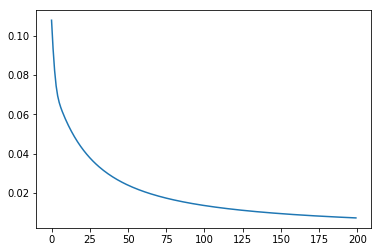

In [52]:
plt.plot(loss)
plt.show()

In [53]:
y_pred=predict(x_test,w,b,threshold=0.5)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("ACCURACY :",((cm[0][0]+cm[1][1])/np.sum(cm)) )

[[2 0]
 [0 1]]
ACCURACY : 1.0
